# Exercises

## Exercise 1: explore filter parameters
---
In this exercises you will explore how different parameters affect the filtering process.
- Import the data form `data/moving_lfp.pickle` (the file is already on your machine if you run the `download_data()` cell in the main lesson)
- Take a few seconds of the data, and filter them in different frequency bands. Plot the resulting singal.
  Fix the central frequency and play with the width of the band, then try to change the central frequency of the band.
- Change the order of the filter, keeping the frequency band fixed. How does the filtered signal change? How does the computing time change? (You can try to quantify the computing time with the jupyter magic command [`%timeit`](https://docs.python.org/3/library/timeit.html) )
- Comment on what you see

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import numpy as np
import sys
import os
sys.path.append(os.path.abspath("code"))
from utils import download_data
import lfp_functions as lf

sns.set_theme(context='notebook',style='white',font_scale=1.5,
              rc = {'axes.spines.top':False,'axes.spines.right':False,
                     'image.cmap':plt.cm.jet})

In [2]:
# Download lesson data
download_data('https://surfdrive.surf.nl/files/index.php/s/7BosHgemAseANIc')

In [3]:
with open('data/moving_lfp.pickle', 'rb') as handle:
    lfp_data = pickle.load(handle)

lfp = lfp_data['lfp']
sampling_rate = lfp_data['sampling_rate']
print(f'Loaded {len(lfp)/sampling_rate} seconds of LFP, sampled at {sampling_rate} Hz')

Loaded 600.133 seconds of LFP, sampled at 1000.0 Hz


Text(0, 0.5, 'voltage (mV)')

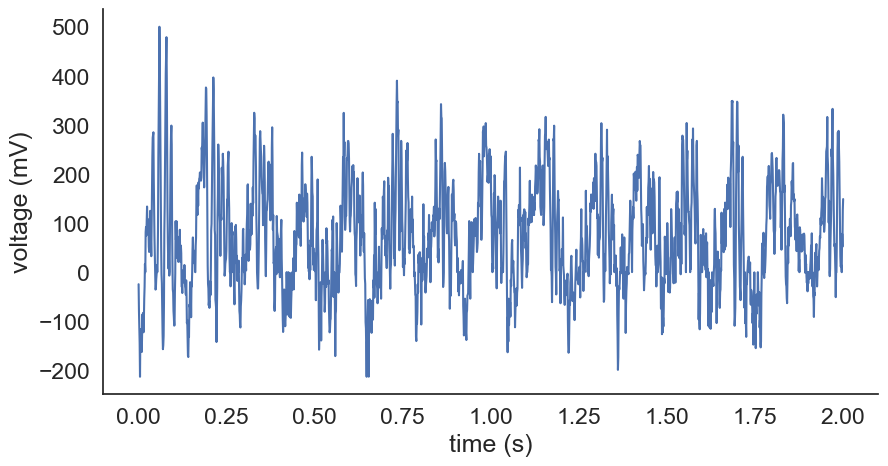

In [4]:
plt.figure(figsize=(10,5))
plt.plot(np.linspace(0,2,2000),lfp[:2000])
plt.xlabel('time (s)')
plt.ylabel('voltage (mV)')

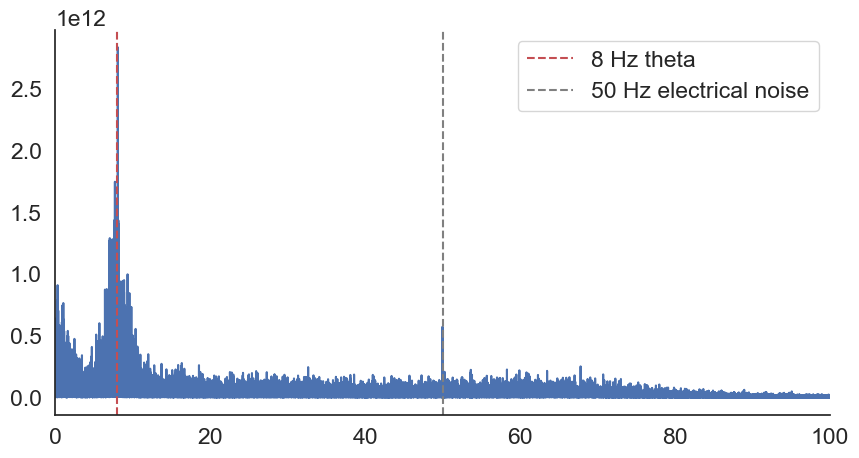

In [5]:
from scipy.fft import fft, fftfreq

n_samples = len(lfp)
sample_dt = 1. / sampling_rate

# we subtract the mean to get rid of the 0 frequency component in the spectrum
centered_lfp = lfp - np.mean(lfp)

transformed_signal = fft(centered_lfp) 

frequencies = fftfreq(n_samples,sample_dt) 

transformed_signal = transformed_signal[:n_samples//2]
frequencies = frequencies[:n_samples//2]

power = abs(transformed_signal)**2

plt.figure(figsize = (10,5))
plt.plot(frequencies,power)
plt.xlim([0,100]) # restrict to 
plt.axvline(x=8 ,c='r',linestyle='--',label='8 Hz theta')
plt.axvline(x=50 ,c='grey',linestyle='--',label='50 Hz electrical noise')

plt.legend()


Text(0, 0.5, 'voltage (mV)')

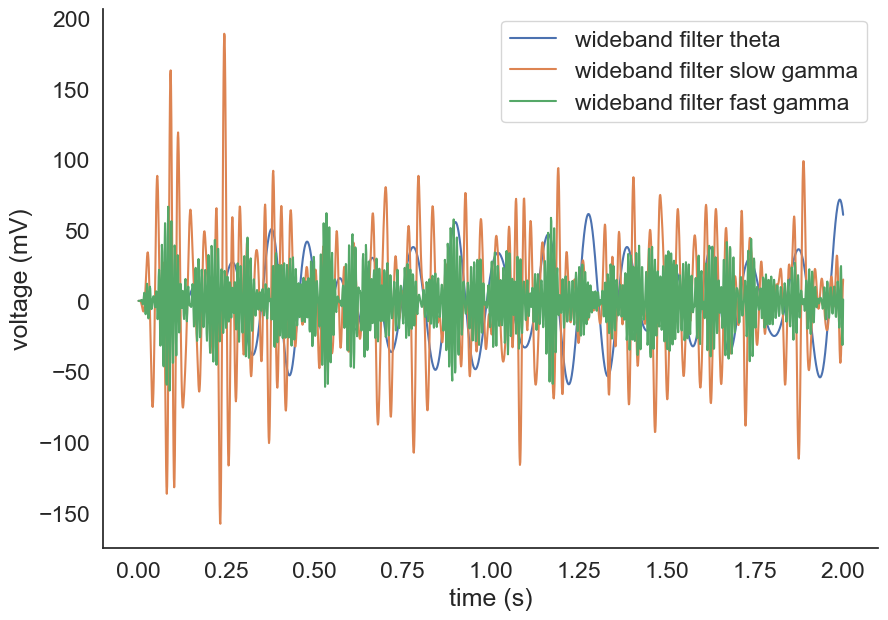

In [6]:
from scipy.signal import butter
from scipy.signal import sosfilt

filter_order = 5 #the higher the order, the sharper the filter frequency response, 
                 #but with more computations and potental numerical instability
low_f1 = 8
high_f1 = 12

low_f2 = 20
high_f2 = 50

low_f3 = 100
high_f3 = 140

#define filter object
filter1 = butter(filter_order,[low_f1,high_f1],
                btype='band', 
                output='sos', 
                fs=sampling_rate)

filter2 = butter(filter_order,[low_f2,high_f2],
                btype='band', 
                output='sos', 
                fs=sampling_rate)

filter3 = butter(filter_order,[low_f3,high_f3],
                btype='band', 
                output='sos', 
                fs=sampling_rate)
                
#apply filter to lfp       
wideband_lfp1 = sosfilt(filter1, lfp)
wideband_lfp2= sosfilt(filter2, lfp)
wideband_lfp3 = sosfilt(filter3, lfp)

plt.figure(figsize=(10,7))
plt.plot(np.linspace(0,2,2000),wideband_lfp1[:2000],label = 'wideband filter theta')
plt.plot(np.linspace(0,2,2000),wideband_lfp2[:2000],label = 'wideband filter slow gamma')
plt.plot(np.linspace(0,2,2000),wideband_lfp3[:2000],label = 'wideband filter fast gamma')
plt.xlabel('time (s)')
plt.legend()
plt.ylabel('voltage (mV)')

After collecting the data, I spent 2 seconds plotting it. Then, I divided the data into three distinct frequency bands: theta (8-12 hz) using a wideband filter, slow gamma (20-50 hz) using another wideband filter, and fast gamma (100-140 hz) using a wideband filter as well.

Text(0, 0.5, 'voltage (mV)')

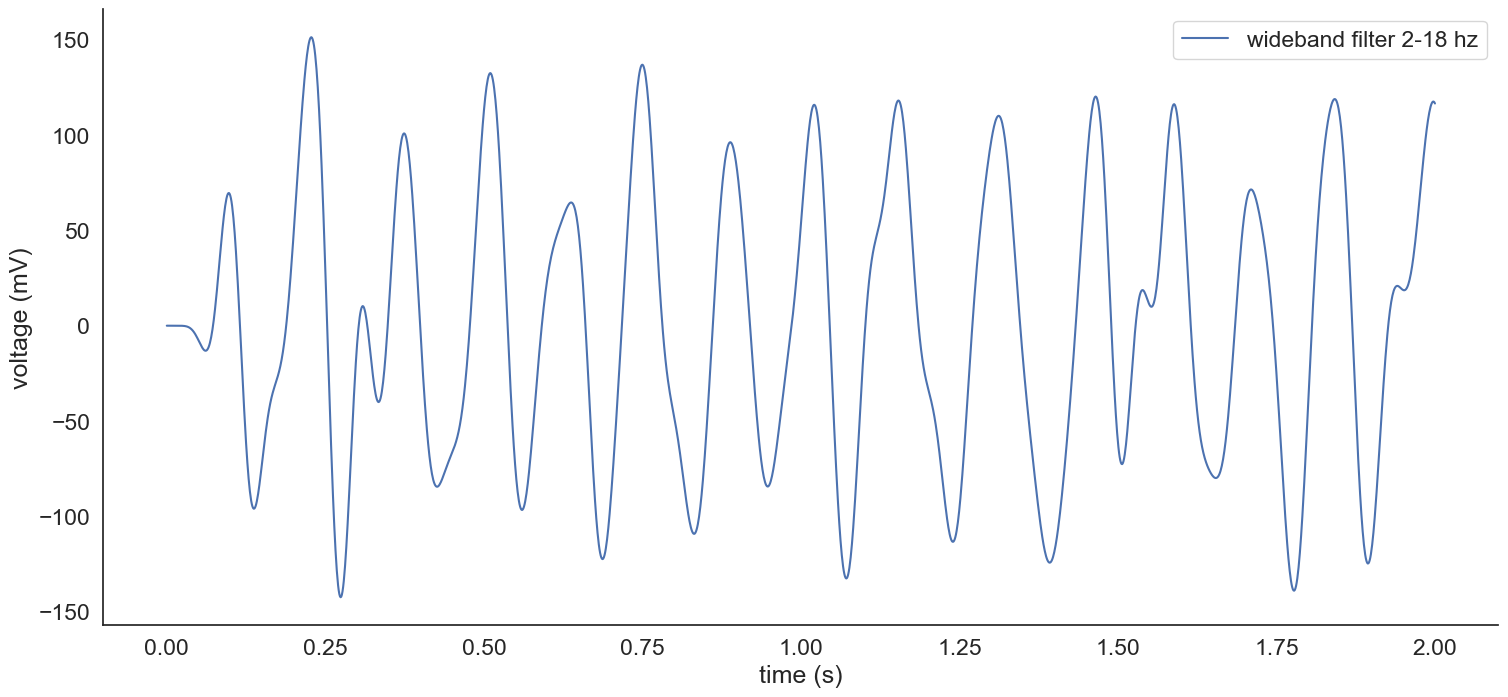

In [7]:
from scipy.signal import butter
from scipy.signal import sosfilt

filter_order = 10 #the higher the order, the sharper the filter frequency response, 
                 #but with more computations and potental numerical instability
low_f1 = 2
high_f1 = 18

low_f2 = 25
high_f2 = 45

low_f3 = 90
high_f3 = 150

#define filter object
filter1 = butter(filter_order,[low_f1,high_f1],
                btype='band', 
                output='sos', 
                fs=sampling_rate)

filter2 = butter(filter_order,[low_f2,high_f2],
                btype='band', 
                output='sos', 
                fs=sampling_rate)

filter3 = butter(filter_order,[low_f3,high_f3],
                btype='band', 
                output='sos', 
                fs=sampling_rate)
                
#apply filter to lfp       
wideband_lfp1 = sosfilt(filter1, lfp)
wideband_lfp2= sosfilt(filter2, lfp)
wideband_lfp3 = sosfilt(filter3, lfp)

plt.figure(figsize=(18,8))
plt.plot(np.linspace(0,2,2000),wideband_lfp1[:2000],label = 'wideband filter 2-18 hz')
plt.xlabel('time (s)')
plt.legend()
plt.ylabel('voltage (mV)')

Text(0, 0.5, 'voltage (mV)')

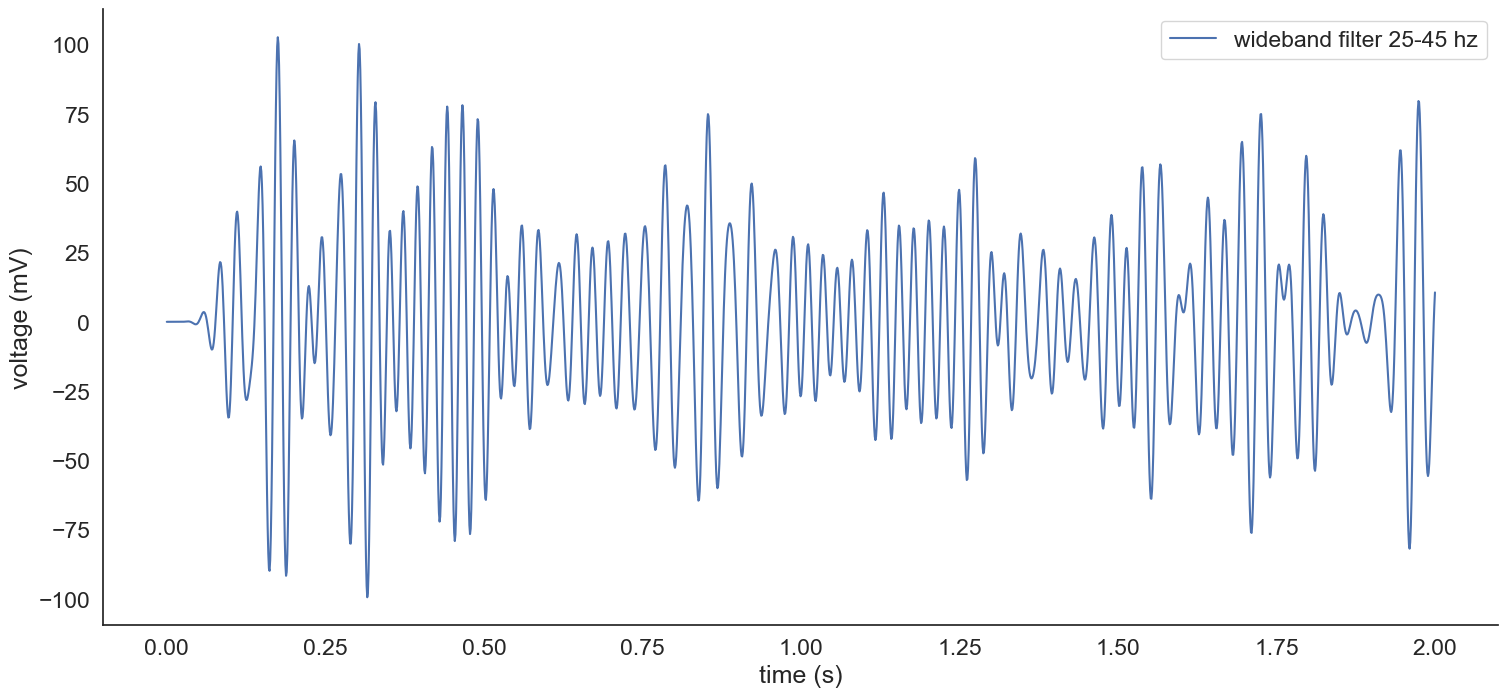

In [8]:
plt.figure(figsize=(18,8))
plt.plot(np.linspace(0,2,2000),wideband_lfp2[:2000],label = 'wideband filter 25-45 hz')
plt.xlabel('time (s)')
plt.legend()
plt.ylabel('voltage (mV)')

Text(0, 0.5, 'voltage (mV)')

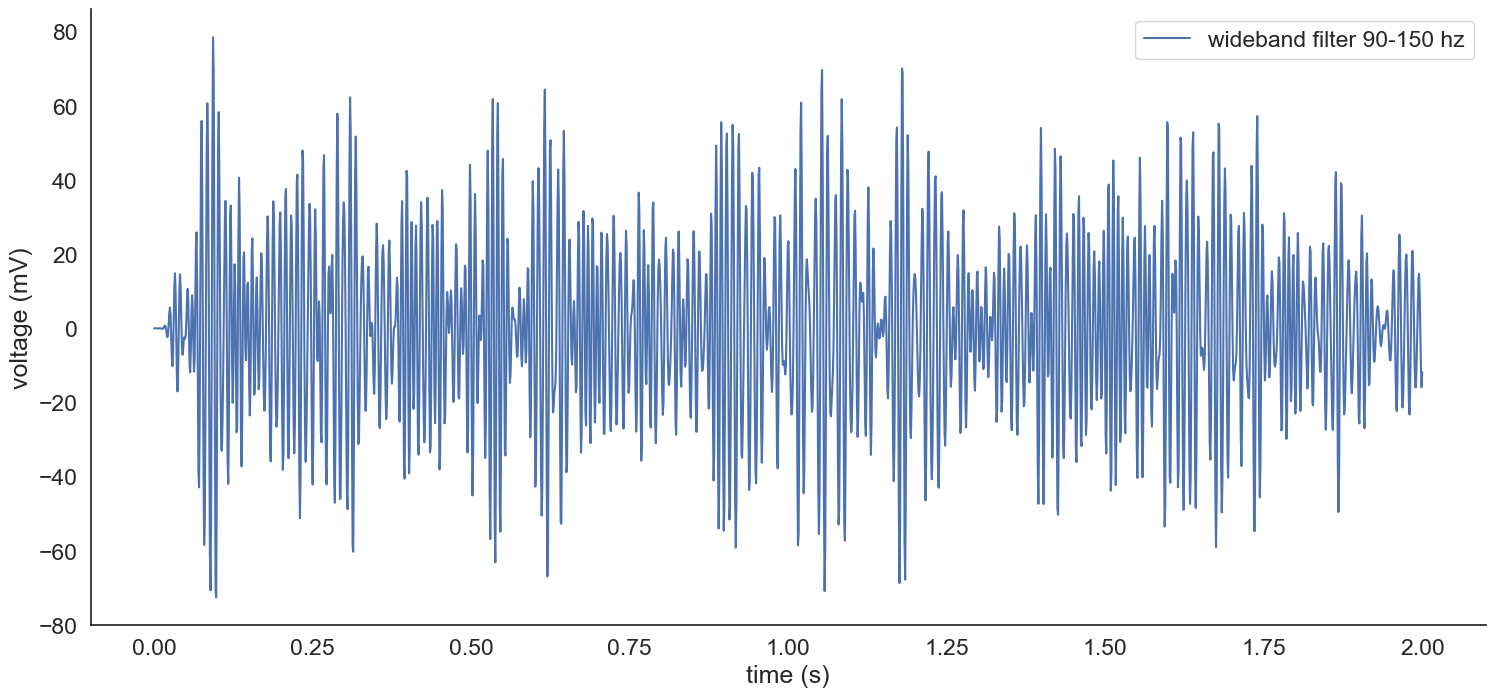

In [9]:
plt.figure(figsize=(18,8))
plt.plot(np.linspace(0,2,2000),wideband_lfp3[:2000],label = 'wideband filter 90-150 hz')
plt.xlabel('time (s)')
plt.legend()
plt.ylabel('voltage (mV)')

The core frequency stayed constant in relation to the initial filters used (8-12Hz, 20-50Hz, 100-140Hz). The frequencies in the center were 10 Hz, 35 Hz, and 120 Hz. To mitigate the interference caused by the raw data, I created three separate charts, each focusing on the individual frequency band. Therefore, the three plots now have the following frequency ranges: 2-18Hz, 25-45Hz, and 90-150Hz, respectively. 


Text(0, 0.5, 'voltage (mV)')

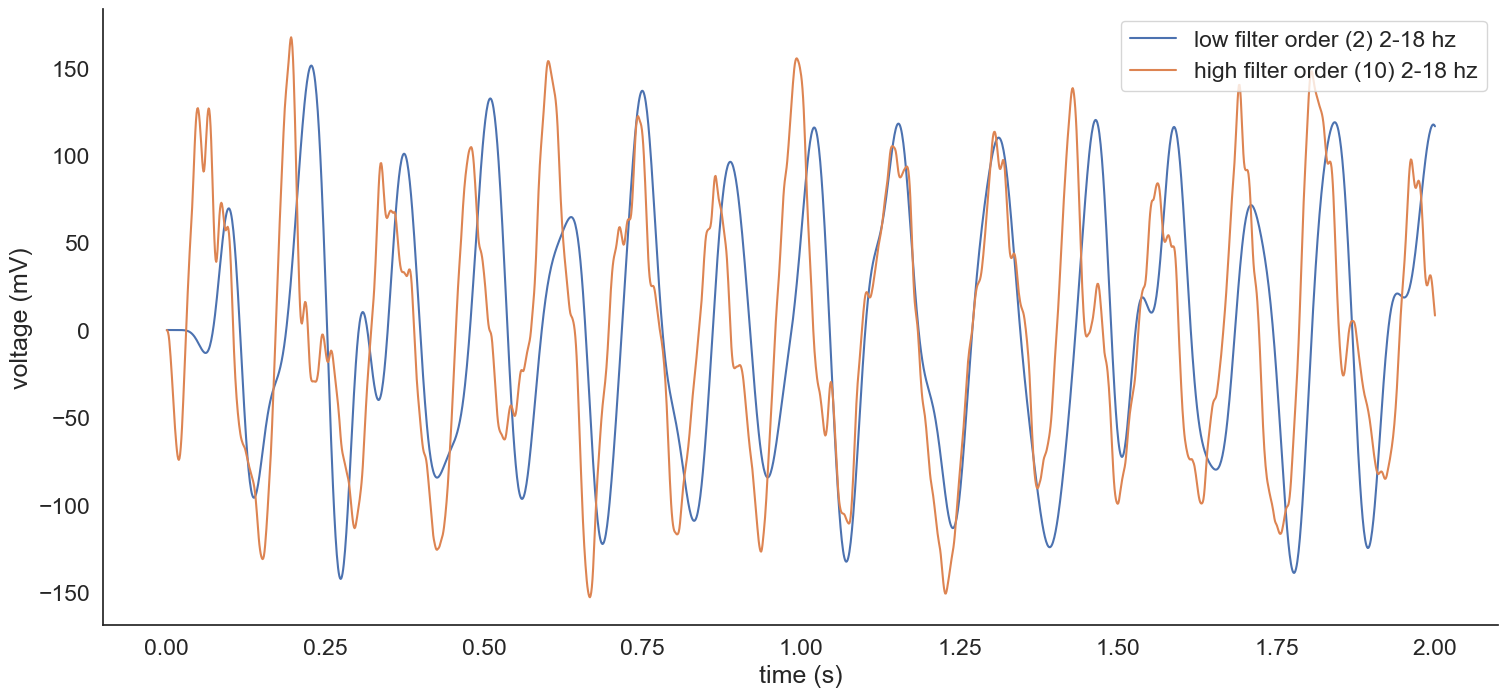

In [10]:
from scipy.signal import butter
from scipy.signal import sosfilt

filter_order = 2 #the higher the order, the sharper the filter frequency response, 
                 #but with more computations and potental numerical instability
low_f4 = 2
high_f4 = 18

#define filter object
filter4 = butter(filter_order,[low_f4,high_f4],
                btype='band', 
                output='sos', 
                fs=sampling_rate)
                
#apply filter to lfp       
wideband_lfp4 = sosfilt(filter4, lfp)

plt.figure(figsize=(18,8))
plt.plot(np.linspace(0,2,2000),wideband_lfp1[:2000],label = 'low filter order (2) 2-18 hz')
plt.plot(np.linspace(0,2,2000),wideband_lfp4[:2000],label = 'high filter order (10) 2-18 hz')
plt.xlabel('time (s)')
plt.legend()
plt.ylabel('voltage (mV)')

For the 2-18 Hz fixed band I applied a low order filter (2) and a high order filter (10). When looking at the results, the low order filter showed a raw display (more global) of the bandpass compared to the high order filter. When the filter order is higher, the roll-off between the passband and stopband is usually steeper. This makes the filter more selective and the transition band smaller. So, raising the order of the filter can make it so that frequencies outside the desired passband are attenuated more strongly. This can make the filtered signal cleaner by removing more of the noise from nearby frequency components. Higher-order filters, in general, it takes longer to do calculations when the order of the filter is raised. It takes more time and computing power to handle higher-order filters because they use more complicated mathematical operations. 

## Exercise 2: wavelet transform with real wavelets
---
In this exercises you will explore the difference between real and complex wavelets in the continous wavelet transform.
- Import the data form `data/moving_lfp.pickle`
- Select a period of a few seconds of the signal and compute the spectrogram. 
  Try the wavelet transform with wavelet `mexh` (mexican hat),`gaus` (gaussian) and `morl` (morlet). These are all real wavelets.
- What differences do you see with respect to the spectrum computed with the complex Morlet tranform ? Comment on why do you think this might be the case.

In [11]:
from scipy import signal
from pywt import scale2frequency
from pywt import cwt

In [12]:
from ipywidgets import interact
import ipywidgets as widgets


def plot_wavelet(scale,freq):
    plt.figure(figsize=(10,5))
    wavelet = signal.morlet(1000,s=scale,w=freq)
    envelope = abs(wavelet)
    plt.plot(wavelet.real,label='wavelet (real part)')
    plt.plot(envelope, label = 'envelope')
    plt.legend(loc=[1,1])
    plt.axis('off')

interact(plot_wavelet, scale = widgets.FloatSlider(min=.05, max=2, value=.5),
                       freq = widgets.FloatSlider(min=1, max=20, value=5))

interactive(children=(FloatSlider(value=0.5, description='scale', max=2.0, min=0.05), FloatSlider(value=5.0, d…

<function __main__.plot_wavelet(scale, freq)>

In [13]:
from pywt import wavelist

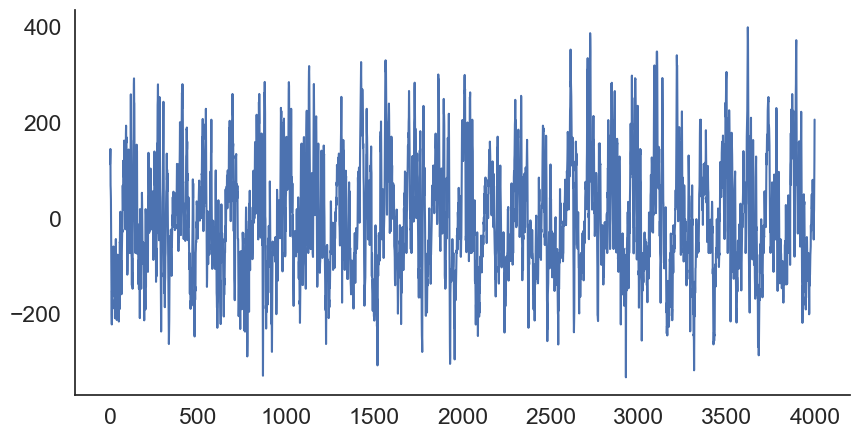

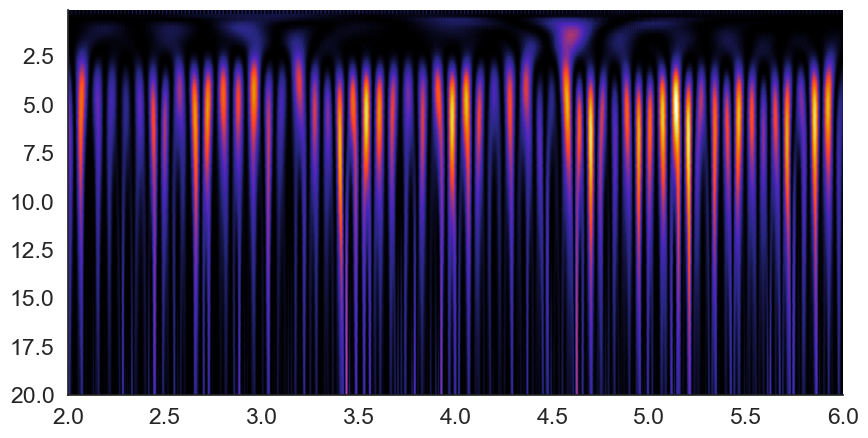

In [14]:
from pywt import scale2frequency
from pywt import cwt

start = 2 #in seconds
end = 6 # in seconds

sig = lfp[int(start*sampling_rate):int(end*sampling_rate)]
sig = sig - np.mean(sig) # get rid of 0 frequency component

plt.figure(figsize=(10,5))
plt.plot(sig)

#spectrogram with gaus1 transform

frequencies =  np.linspace(0.1,20,100)/sampling_rate
wavelet = 'gaus1'
scales = scale2frequency(wavelet, frequencies)
cwtmatr, _ = cwt(sig, wavelet=wavelet, scales=scales,
                  sampling_period=1.0/sampling_rate)
plt.figure(figsize=(10,5))
plt.imshow(abs(cwtmatr)**2, extent=[start,end,frequencies[-1]*sampling_rate,
                         frequencies[0]*sampling_rate], aspect='auto', cmap='CMRmap')

This is the spectogram with the gaus1 filter applied. 

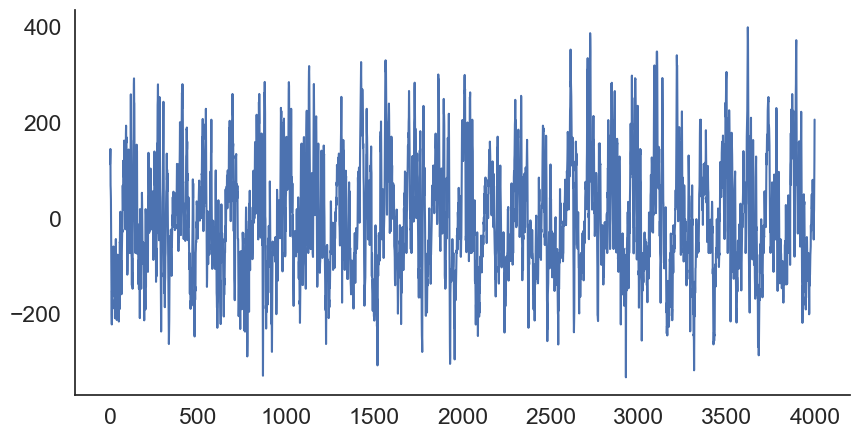

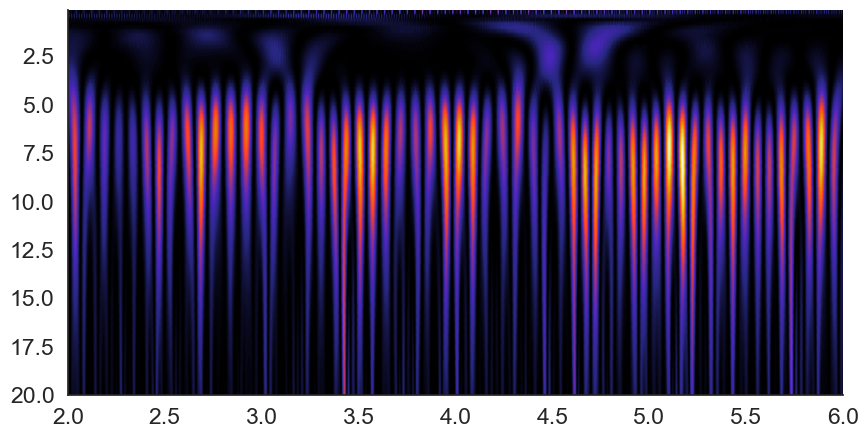

In [15]:
from pywt import scale2frequency
from pywt import cwt

start = 2 #in seconds
end = 6 # in seconds

sig = lfp[int(start*sampling_rate):int(end*sampling_rate)]
sig = sig - np.mean(sig) # get rid of 0 frequency component

plt.figure(figsize=(10,5))
plt.plot(sig)

#spectrogram with mexh transform

frequencies =  np.linspace(0.1,20,100)/sampling_rate
wavelet = 'mexh'
scales = scale2frequency(wavelet, frequencies)
cwtmatr, _ = cwt(sig, wavelet=wavelet, scales=scales,
                  sampling_period=1.0/sampling_rate)
plt.figure(figsize=(10,5))
plt.imshow(abs(cwtmatr)**2, extent=[start,end,frequencies[-1]*sampling_rate,
                         frequencies[0]*sampling_rate], aspect='auto', cmap='CMRmap')

Spectogram with Mexh filter applied

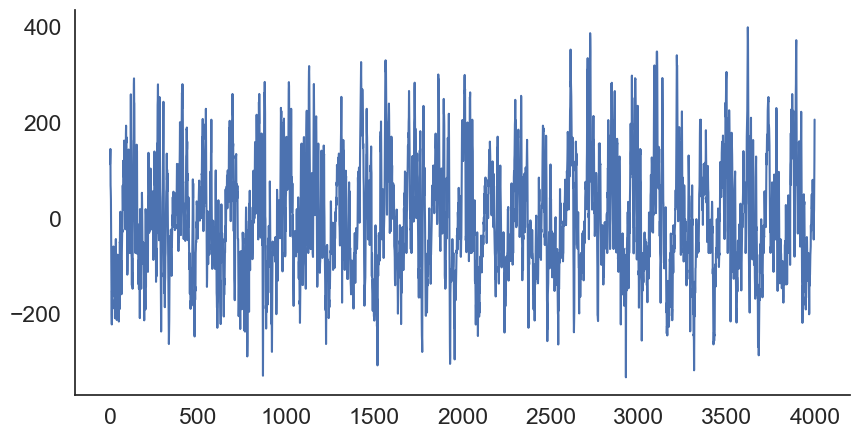

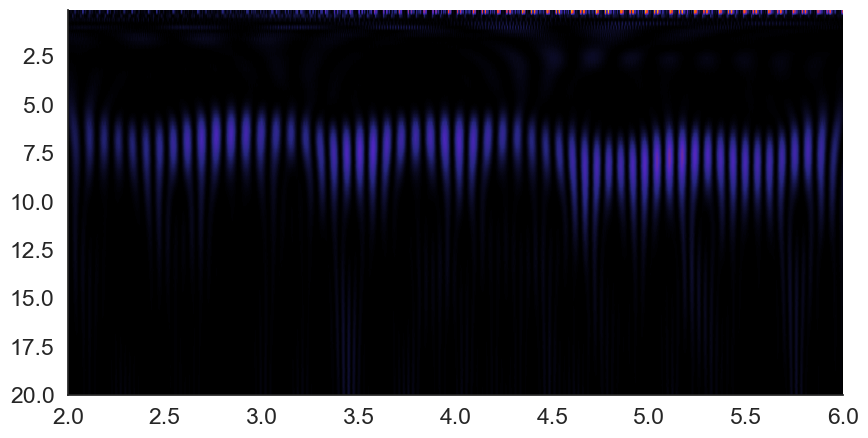

In [16]:
from pywt import scale2frequency
from pywt import cwt

start = 2 #in seconds
end = 6 # in seconds

sig = lfp[int(start*sampling_rate):int(end*sampling_rate)]
sig = sig - np.mean(sig) # get rid of 0 frequency component

plt.figure(figsize=(10,5))
plt.plot(sig)

#spectrogram with morlet transform

frequencies =  np.linspace(0.1,20,100)/sampling_rate
wavelet = 'morl'
scales = scale2frequency(wavelet, frequencies)
cwtmatr, _ = cwt(sig, wavelet=wavelet, scales=scales,
                  sampling_period=1.0/sampling_rate)
plt.figure(figsize=(10,5))
plt.imshow(abs(cwtmatr)**2, extent=[start,end,frequencies[-1]*sampling_rate,
                         frequencies[0]*sampling_rate], aspect='auto', cmap='CMRmap')

Spectogram with Morlet filter applied

Spectrogram analysis utilizes wavelets to examine signals in both the time and frequency domains, offering a comprehensive depiction of signal components and their temporal fluctuations. When comparing the Morlet to the Mexican and the Gaussian it is seen that the Morlet filter show no warm colors such as red/orange. Also, a more precise/small region of the spectogram shows colour. Tis can be caused by that the Mexican Hat and Gaussian spectogram have a wider frequency domain. This means that they have lower frequency resolution and a greater time-frequency localization. The Morlet wavelet has smaller main lobes that make it possible to finetune frequency resolution and localize time and frequency more precisely. This means that there is more noise reduction compared to the Gaus1 and Mexh.


## Exercise 3: REM sleep detection
---
Mammalian sleep is organized in different phases. [Rapid Eye Movement (REM) sleep](https://en.wikipedia.org/wiki/Rapid_eye_movement_sleep) is a well studied phase, with clear markers that make it detectable from LFP data. One of the most used marker is the ratio (or difference) between the oscillatory power in the theta and delta bands in the hippocampus. During REM sleep, the former dominates, in a pattern that resembles active behaviour.  
In this exercise we will use the tools we learned about to detect and inspect the REM and non-REM (nREM) phases of sleep in data recorded from the hippocampus of a sleeping mouse.

- Import the data form `data/moving_lfp.pickle`
- Compute the instantaneous power in the theta (6-10 Hz) and delta (2-4 Hz) frequency bands, for the whole signal.
- z-score the two power signals (subtract the mean and divide by the standard deviation, you can use `scipy.stats.zscore()`)
- Compute and plot the power difference (`theta_power - delta_power`) for the sleep session.
- Compute the REM (power difference $>0.2$) and nREM (power diffewrence $<0.2$) sleep periods.
- Plot examples of REM vs nREM lfp signals (wideband filtered betw. 1 and 200 Hz to get rid of some of the noise).
- Explore how changing the threshold affects the amount of REM sleep detected.

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import numpy as np
import sys
import os
sys.path.append(os.path.abspath("code"))
from utils import download_data
import lfp_functions as lf

sns.set_theme(context='notebook',style='white',font_scale=1.5,
              rc = {'axes.spines.top':False,'axes.spines.right':False,
                     'image.cmap':plt.cm.jet})

In [18]:
# Download lesson data
download_data('https://surfdrive.surf.nl/files/index.php/s/7BosHgemAseANIc')

In [19]:
with open('data/sleep_lfp.pickle', 'rb') as handle:
    lfp_data = pickle.load(handle)

lfp = lfp_data['lfp']
sampling_rate = lfp_data['sampling_rate']
print(f'Loaded {len(lfp)/sampling_rate} seconds of LFP, sampled at {sampling_rate} Hz')

Loaded 1816.576 seconds of LFP, sampled at 1000.0 Hz


Text(0, 0.5, 'voltage (mV)')

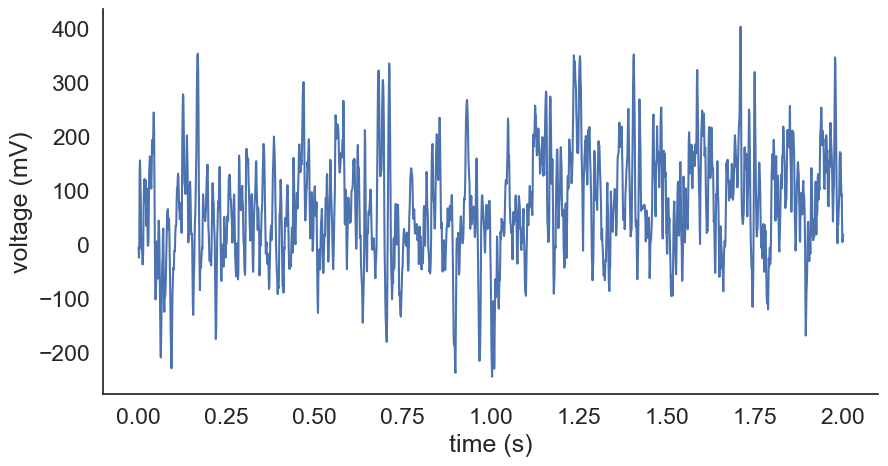

In [20]:
plt.figure(figsize=(10,5))
plt.plot(np.linspace(0,2,2000),lfp[:2000])
plt.xlabel('time (s)')
plt.ylabel('voltage (mV)')

Loaded 1816.576 seconds of LFP, sampled at 1000.0 Hz


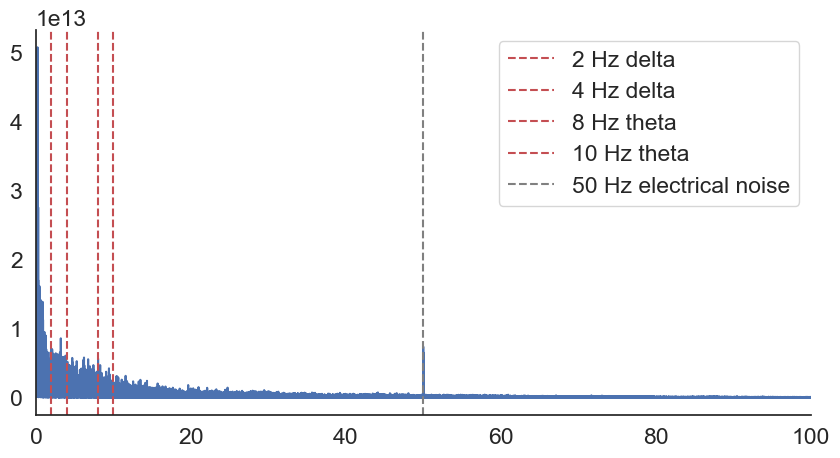

In [21]:
from scipy.fft import fft, fftfreq

with open('data/sleep_lfp.pickle', 'rb') as handle:
    lfp_data = pickle.load(handle)

lfp = lfp_data['lfp']
sampling_rate = lfp_data['sampling_rate']
print(f'Loaded {len(lfp)/sampling_rate} seconds of LFP, sampled at {sampling_rate} Hz')

n_samples = len(lfp)
sample_dt = 1. / sampling_rate

# we subtract the mean to get rid of the 0 frequency component in the spectrum
centered_lfp = lfp - np.mean(lfp)

transformed_signal = fft(centered_lfp) 

frequencies = fftfreq(n_samples,sample_dt) 

transformed_signal = transformed_signal[:n_samples//2]
frequencies = frequencies[:n_samples//2]

power = abs(transformed_signal)**2

plt.figure(figsize = (10,5))
plt.plot(frequencies,power)
plt.xlim([0,100]) # restrict to 
plt.axvline(x=2 ,c='r',linestyle='--',label='2 Hz delta')
plt.axvline(x=4 ,c='r',linestyle='--',label='4 Hz delta')
plt.axvline(x=8 ,c='r',linestyle='--',label='8 Hz theta')
plt.axvline(x=10 ,c='r',linestyle='--',label='10 Hz theta')
plt.axvline(x=50 ,c='grey',linestyle='--',label='50 Hz electrical noise')

plt.legend()


Text(0, 0.5, 'voltage (mV)')

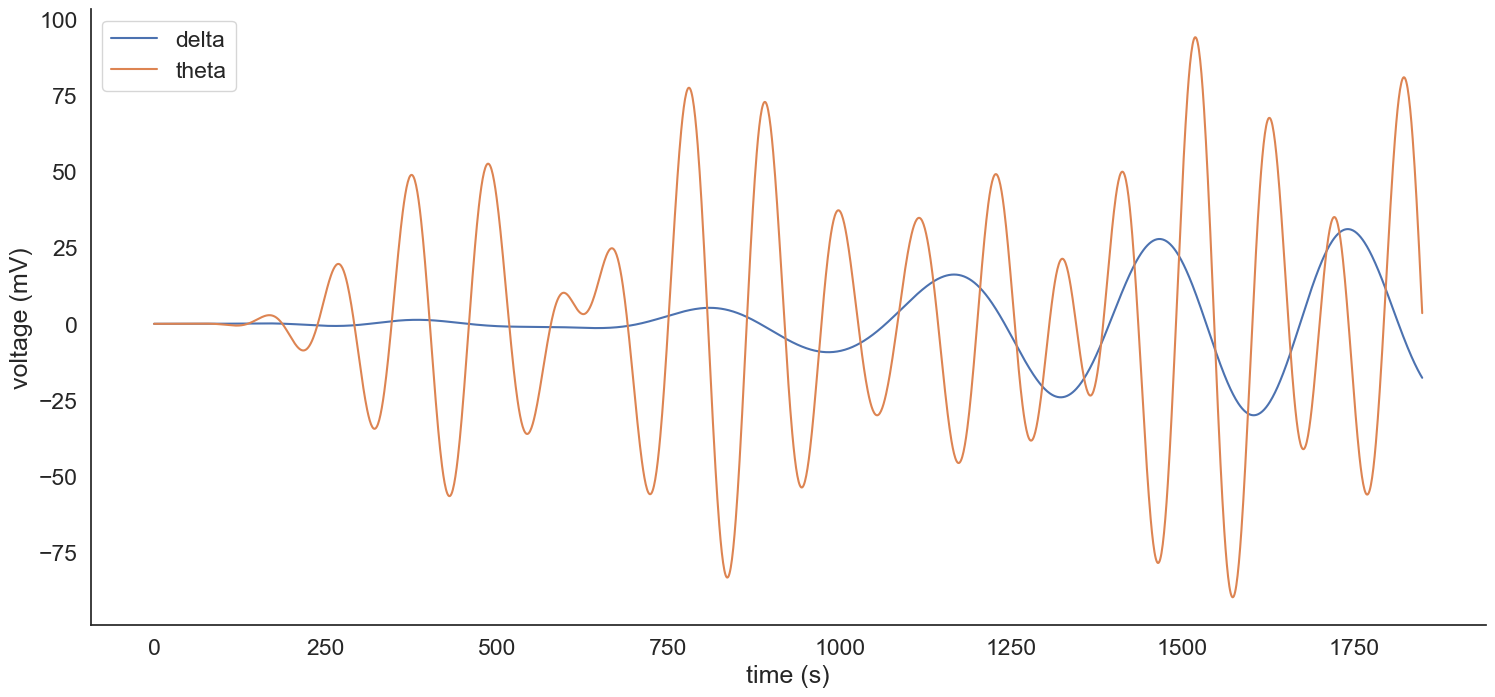

In [22]:
from scipy.signal import butter
from scipy.signal import sosfilt

with open('data/sleep_lfp.pickle', 'rb') as f:
    data = pickle.load(f)

filter_order = 7 #the higher the order, the sharper the filter frequency response, 
                 #but with more computations and potental numerical instability (6-10 Hz) and delta (2-4 Hz)
low_f1 = 2
high_f1 = 4

low_f2 = 6
high_f2 = 10

#define filter object
filter1 = butter(filter_order,[low_f1,high_f1],
                btype='band', 
                output='sos', 
                fs=sampling_rate)

filter2 = butter(filter_order,[low_f2,high_f2],
                btype='band', 
                output='sos', 
                fs=sampling_rate)

                
#apply filter to lfp       
wideband_lfp1 = sosfilt(filter1, lfp)
wideband_lfp2= sosfilt(filter2, lfp)

plt.figure(figsize=(18,8))
plt.plot(np.linspace(0,1850,2000),wideband_lfp1[:2000],label = 'delta')
plt.plot(np.linspace(0,1850,2000),wideband_lfp2[:2000],label = 'theta')
plt.xlabel('time (s)')
plt.legend()
plt.ylabel('voltage (mV)')

Text(0, 0.5, 'voltage (mV)')

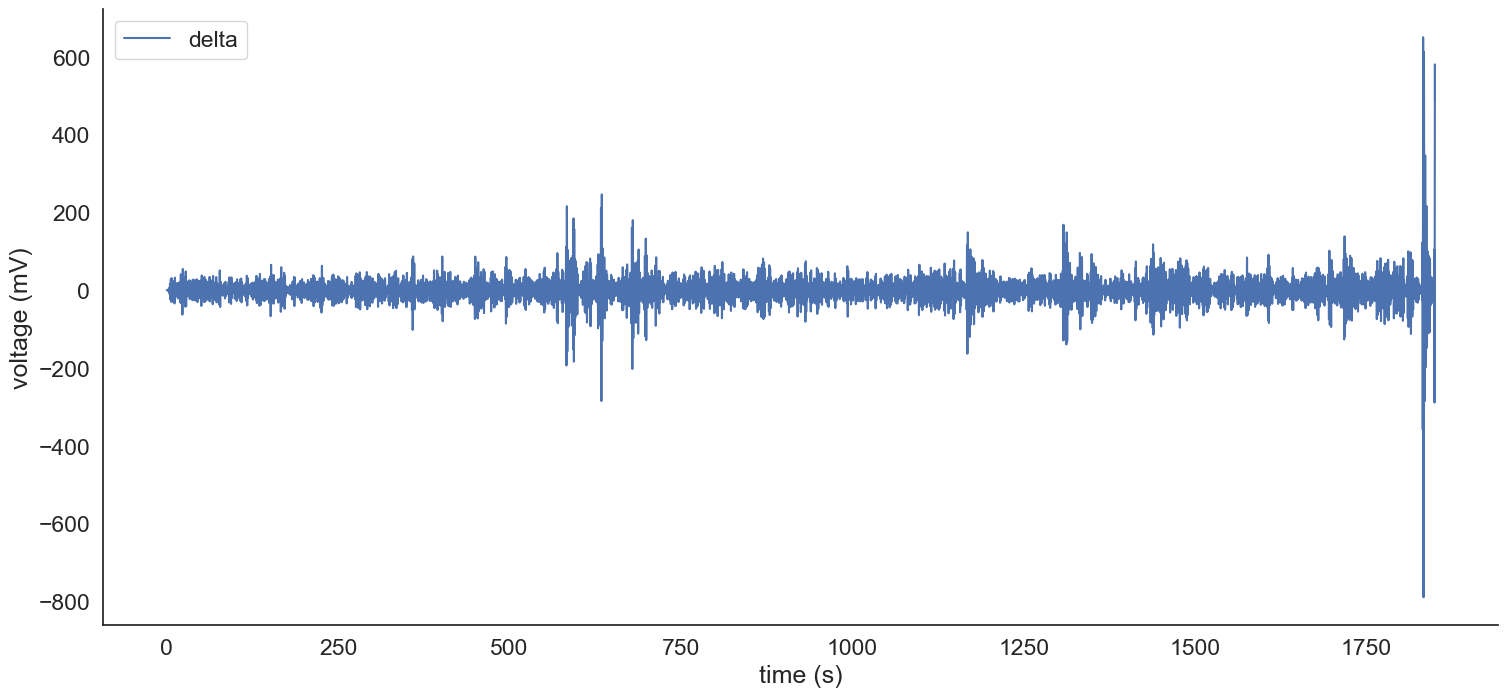

In [23]:
from scipy.signal import butter
from scipy.signal import sosfilt

with open('data/sleep_lfp.pickle', 'rb') as f:
    data = pickle.load(f)

filter_order = 7 #the higher the order, the sharper the filter frequency response, 
                 #but with more computations and potental numerical instability (6-10 Hz) and delta (2-4 Hz)
low_f1 = 2
high_f1 = 4


#define filter object
filter1 = butter(filter_order,[low_f1,high_f1],
                btype='band', 
                output='sos', 
                fs=sampling_rate)

#apply filter to lfp       
wideband_lfp1 = sosfilt(filter1, lfp)


plt.figure(figsize=(18,8))
plt.plot(np.linspace(0,1850,500000),wideband_lfp1[:500000],label = 'delta')
plt.xlabel('time (s)')
plt.legend()
plt.ylabel('voltage (mV)')

This is the instanous power in the delta frequency band.

Text(0, 0.5, 'voltage (mV)')

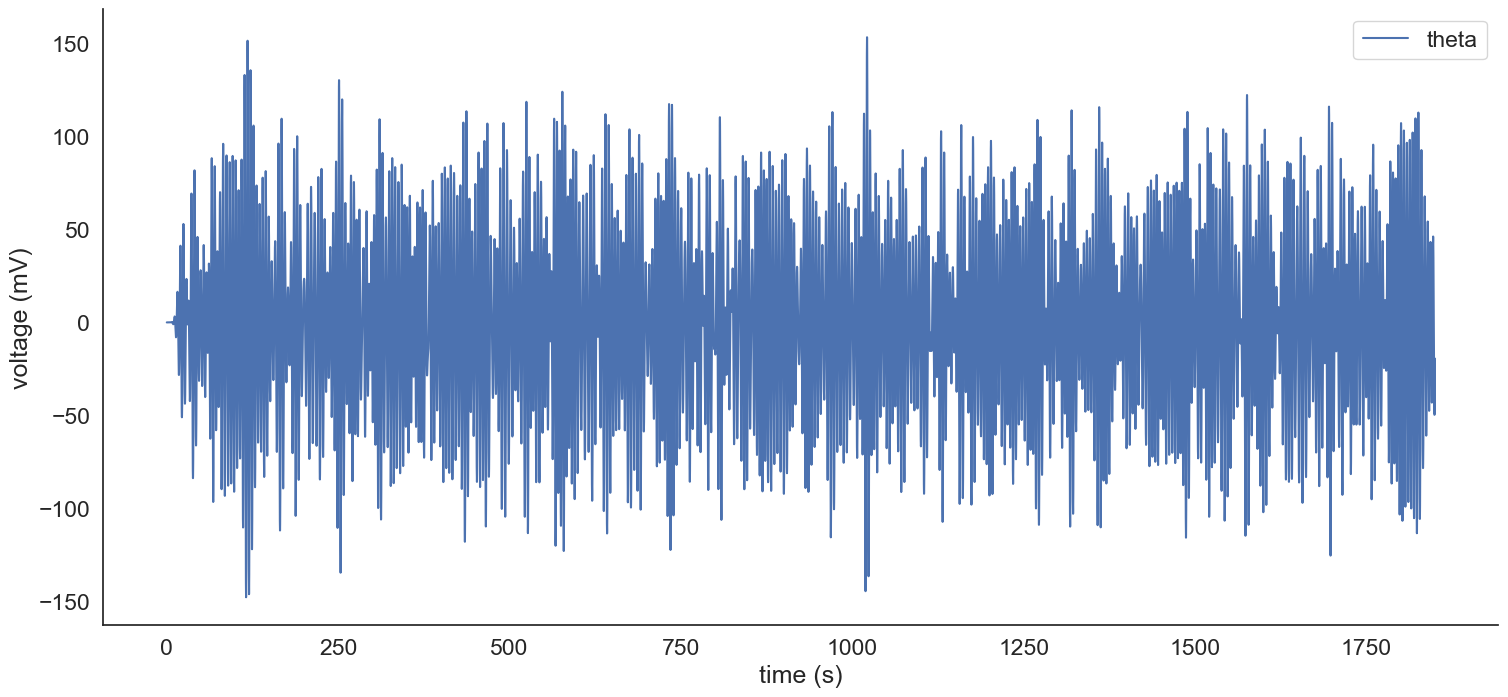

In [24]:
from scipy.signal import butter
from scipy.signal import sosfilt

with open('data/sleep_lfp.pickle', 'rb') as f:
    data = pickle.load(f)

filter_order = 10 #the higher the order, the sharper the filter frequency response, 
                 #but with more computations and potental numerical instability
low_f1 = 6
high_f1 = 10

#define filter object
filter1 = butter(filter_order,[low_f1,high_f1],
                btype='band', 
                output='sos', 
                fs=sampling_rate)            
#apply filter to lfp       
wideband_lfp1 = sosfilt(filter1, lfp)


plt.figure(figsize=(18,8))
plt.plot(np.linspace(0,1850,50000),wideband_lfp1[:50000],label = 'theta')


plt.xlabel('time (s)')
plt.legend()
plt.ylabel('voltage (mV)')

This is the instanenous power in the thate frequency band.

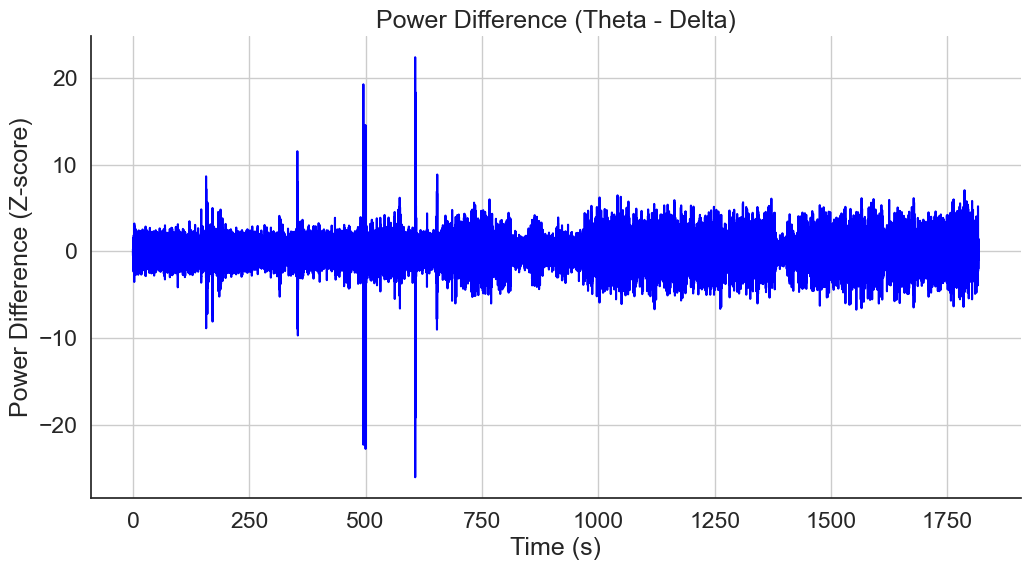

[2.09342468e-05 2.09338224e-05 2.09313295e-05 ... 8.22038940e-01
 9.07611356e-01 9.92664523e-01]
[1.50870961e-05 1.50870813e-05 1.50869939e-05 ... 1.26964685e-03
 1.10853145e-02 2.08901865e-02]
[-5.17781851e-11 -7.51193999e-10 -4.88251823e-09 ...  5.92655796e-02
  5.22959106e-01  9.86142640e-01]
[-1.62387128e-09 -2.34764477e-08 -1.51831561e-07 ...  4.23239075e+01
  4.67298438e+01  5.11090452e+01]
[5.84715069e-06 5.84674108e-06 5.84433561e-06 ... 8.20769293e-01
 8.96526041e-01 9.71774337e-01]


In [25]:
from scipy.stats import zscore
from scipy.signal import butter
from scipy.signal import sosfilt

with open('data/sleep_lfp.pickle', 'rb') as handle:
    lfp_data = pickle.load(handle)

lfp = lfp_data['lfp']
sampling_rate = lfp_data['sampling_rate']

filter_order = 7 #the higher the order, the sharper the filter frequency response, 
                 #but with more computations and potental numerical instability (6-10 Hz) and delta (2-4 Hz)

delta_lfp = lf.bandpass_filter(lfp,low_f=2,high_f=4, sampling_rate=sampling_rate)
theta_lfp = lf.bandpass_filter(lfp,low_f=6,high_f=10, sampling_rate=sampling_rate)

#apply filter to lfp       
wideband_lfp1 = sosfilt(filter1, lfp)
wideband_lfp2= sosfilt(filter2, lfp)

#zscore the delta_lfp and theta_lfp
delta_power_zscore = zscore(delta_lfp)
theta_power_zscore = zscore(theta_lfp)

power_difference = theta_power_zscore - delta_power_zscore


plt.figure(figsize=(12, 6))
plt.plot(np.arange(len(power_difference)) / sampling_rate, power_difference, color='blue')
plt.xlabel('Time (s)')
plt.ylabel('Power Difference (Z-score)')
plt.title('Power Difference (Theta - Delta)')
plt.grid(True)
plt.show()

print(theta_power_zscore)
print(delta_power_zscore)

print(delta_lfp)
print(theta_lfp)

print(power_difference)

This plot shows the z-score power difference (theta substracted by delta).

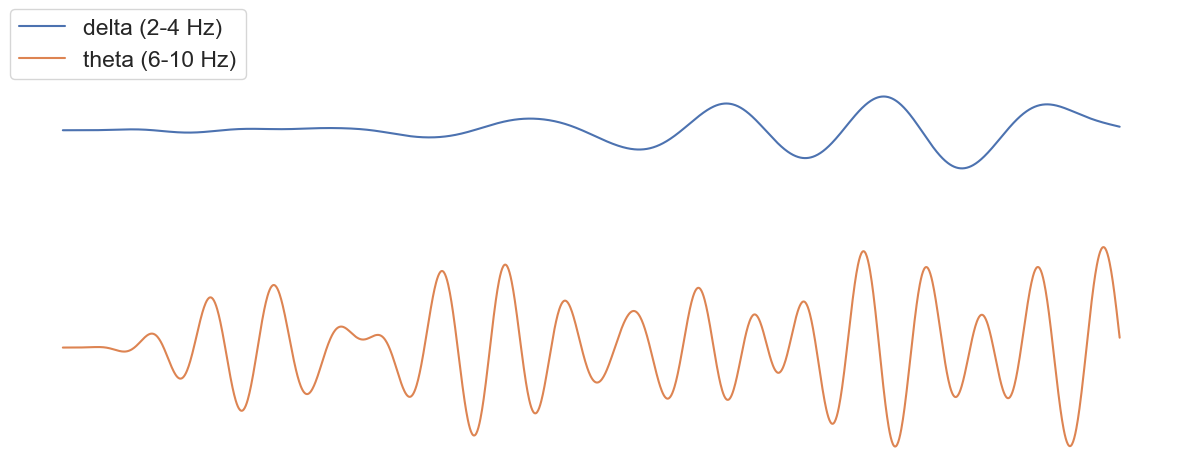

In [26]:
theta_lfp = lf.bandpass_filter(lfp,low_f=2,high_f=4, sampling_rate=sampling_rate)
slow_gamma_lfp = lf.bandpass_filter(lfp,low_f=6,high_f=10, sampling_rate=sampling_rate)


plot_offset = 200 #to plot the signal on different lines

plt.figure(figsize=(15,5))

plt.plot(theta_lfp[:2000]+2*plot_offset,label='delta (2-4 Hz)')
plt.plot(slow_gamma_lfp[:2000]+plot_offset,label = 'theta (6-10 Hz)')


plt.axis('off')
plt.legend(loc=(0,1))

In [27]:
with open('data/sleep_lfp.pickle', 'rb') as handle:
    lfp_data = pickle.load(handle)

sleep_lfp = lfp_data['lfp']
sampling_rate = lfp_data['sampling_rate']
print(f'Loaded {len(lfp)/sampling_rate} seconds of LFP, sampled at {sampling_rate} Hz')

Loaded 1816.576 seconds of LFP, sampled at 1000.0 Hz


In [28]:
def compute_ripple_power_delta(signal,sampling_rate,low_f=2,high_f=4):
    '''Takes lfp signal and sampling rate, returns instantaneous power in the specified band 
    (default is ripple band 100-250 Hz)'''
    signal = signal - np.mean(signal) # get rid of 0 frequency component


    frequencies =  np.linspace(low_f,high_f,50)/sampling_rate
    wavelet = 'cmor1.0-1.0'
    scales = scale2frequency(wavelet, frequencies)
    cwtmatr, _ = cwt(signal, wavelet=wavelet, scales=scales,
                    sampling_period=1.0/sampling_rate)


    power = np.mean(abs(cwtmatr)**2,axis=0)

    return power

def ripple_idxs(ripple_mask):
    '''
    Takes logical ripple mask and returns a list of arrays. Each array correspond to a ripple
    and contains its time idxs (relative to the provided ripple mask)
    '''
    ripple_starts = []
    ripple_ends = []
    for i in range(1, len(ripple_mask)):
        if ripple_mask[i-1] == 0 and ripple_mask[i] == 1:
            ripple_starts.append(i)
        if ripple_mask[i-1] == 1 and ripple_mask[i] == 0:
            ripple_ends.append(i)

    # handle edge cases
    if len(ripple_ends) > len(ripple_starts):
        ripple_starts = [0]+ripple_starts  # if session starts with a ripple

    if len(ripple_ends) < len(ripple_starts):
        ripple_ends.append(len(ripple_mask))  # if session ends with a ripple

    ripples = [np.arange(ripple_starts[i], ripple_ends[i])
               for i in range(len(ripple_starts))]

    return ripples

def clean_ripples(ripples,lfp,ripple_len_th=None,amplitude_th=None):
    '''takes list of ripples and corresponding signal, returns list of ripples cleaned of ripple that are shorter than specified 
    duration threshold or with amplitude larger than specified amplitude threshold (usually artifacts)'''
    clean_ripples = [r for r in ripples if (len(r)>ripple_len_th and \
                    max(lfp[r])< amplitude_th and min(lfp[r])>-amplitude_th)] 
    return clean_ripples

In [30]:
from scipy.stats import zscore

ripple_th = 2

ripple_power = compute_ripple_power_delta(sleep_lfp,sampling_rate)
zscored_power = zscore(ripple_power)

ripple_mask = np.asarray([True if x>ripple_th else 0 for x in zscored_power])

ripples = ripple_idxs(ripple_mask)

ripples = clean_ripples(ripples,sleep_lfp,ripple_len_th=30, amplitude_th=1000)

print(f'detected {len(ripples)} ripples')



detected 5 ripples


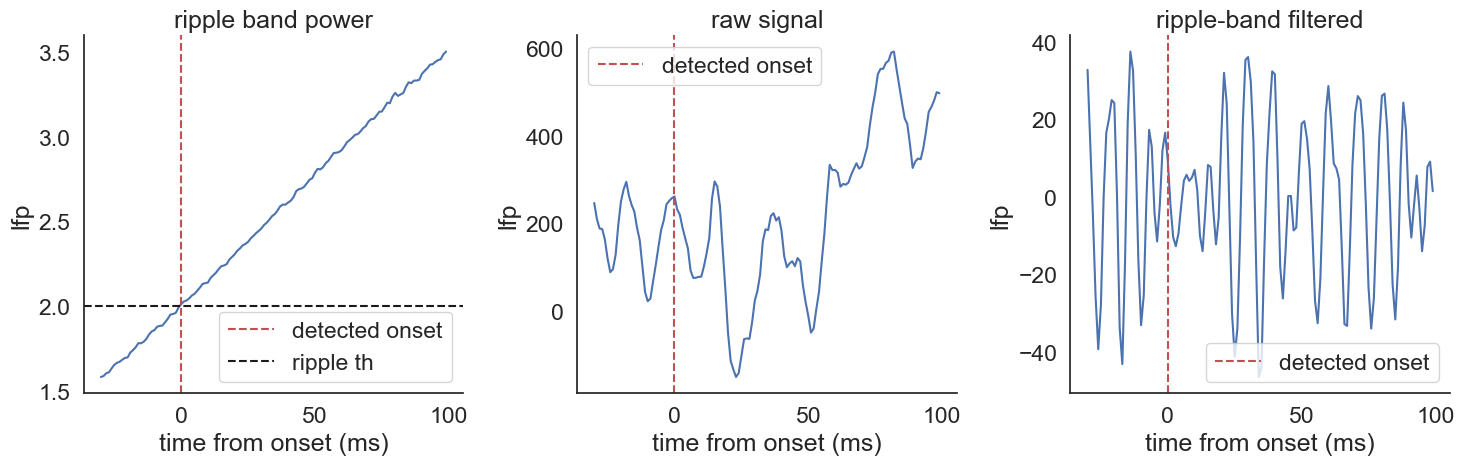

In [31]:
ripple_n = 1

ripple_lfp = lf.bandpass_filter(sleep_lfp,low_f=100,high_f=250, sampling_rate=sampling_rate)


plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
onset = ripples[ripple_n][0]
x = np.arange(-30,100)
y = zscored_power[onset-30:onset+100]
plt.plot(x,y)
plt.axvline(x=0,linestyle='--',c='r',label='detected onset')
plt.axhline(y=2,linestyle='--',c='k',label='ripple th')

plt.title('ripple band power')
plt.xlabel('time from onset (ms)')
plt.ylabel('lfp')
plt.legend()

plt.subplot(1,3,2)
onset = ripples[ripple_n][0]
x = np.arange(-30,100)
y = sleep_lfp[onset-30:onset+100]
plt.plot(x,y)
plt.axvline(x=0,linestyle='--',c='r',label='detected onset')
plt.title('raw signal')
plt.xlabel('time from onset (ms)')
plt.ylabel('lfp')
plt.legend()

plt.subplot(1,3,3)
onset = ripples[ripple_n][0]
x = np.arange(-30,100)
y = ripple_lfp[onset-30:onset+100]
plt.plot(x,y)
plt.axvline(x=0,linestyle='--',c='r',label='detected onset')
plt.title('ripple-band filtered')
plt.xlabel('time from onset (ms)')
plt.ylabel('lfp')
plt.legend()
plt.tight_layout()

In [33]:
def compute_ripple_power(signal,sampling_rate,low_f=6,high_f=10):
    '''Takes lfp signal and sampling rate, returns instantaneous power in the specified band 
    (default is ripple band 100-250 Hz)'''
    signal = signal - np.mean(signal) # get rid of 0 frequency component


    frequencies =  np.linspace(low_f,high_f,50)/sampling_rate
    wavelet = 'cmor1.0-1.0'
    scales = scale2frequency(wavelet, frequencies)
    cwtmatr, _ = cwt(signal, wavelet=wavelet, scales=scales,
                    sampling_period=1.0/sampling_rate)


    power = np.mean(abs(cwtmatr)**2,axis=0)

    return power

def ripple_idxs(ripple_mask):
    '''
    Takes logical ripple mask and returns a list of arrays. Each array correspond to a ripple
    and contains its time idxs (relative to the provided ripple mask)
    '''
    ripple_starts = []
    ripple_ends = []
    for i in range(1, len(ripple_mask)):
        if ripple_mask[i-1] == 0 and ripple_mask[i] == 1:
            ripple_starts.append(i)
        if ripple_mask[i-1] == 1 and ripple_mask[i] == 0:
            ripple_ends.append(i)

    # handle edge cases
    if len(ripple_ends) > len(ripple_starts):
        ripple_starts = [0]+ripple_starts  # if session starts with a ripple

    if len(ripple_ends) < len(ripple_starts):
        ripple_ends.append(len(ripple_mask))  # if session ends with a ripple

    ripples = [np.arange(ripple_starts[i], ripple_ends[i])
               for i in range(len(ripple_starts))]

    return ripples

def clean_ripples(ripples,lfp,ripple_len_th=None,amplitude_th=None):
    '''takes list of ripples and corresponding signal, returns list of ripples cleaned of ripple that are shorter than specified 
    duration threshold or with amplitude larger than specified amplitude threshold (usually artifacts)'''
    clean_ripples = [r for r in ripples if (len(r)>ripple_len_th and \
                    max(lfp[r])< amplitude_th and min(lfp[r])>-amplitude_th)] 
    return clean_ripples

In [34]:
from scipy.stats import zscore

ripple_th = 2

ripple_power = compute_ripple_power(sleep_lfp,sampling_rate)
zscored_power = zscore(ripple_power)

ripple_mask = np.asarray([True if x>ripple_th else 0 for x in zscored_power])

ripples = ripple_idxs(ripple_mask)

ripples = clean_ripples(ripples,sleep_lfp,ripple_len_th=30, amplitude_th=1000)

print(f'detected {len(ripples)} ripples')


detected 50 ripples


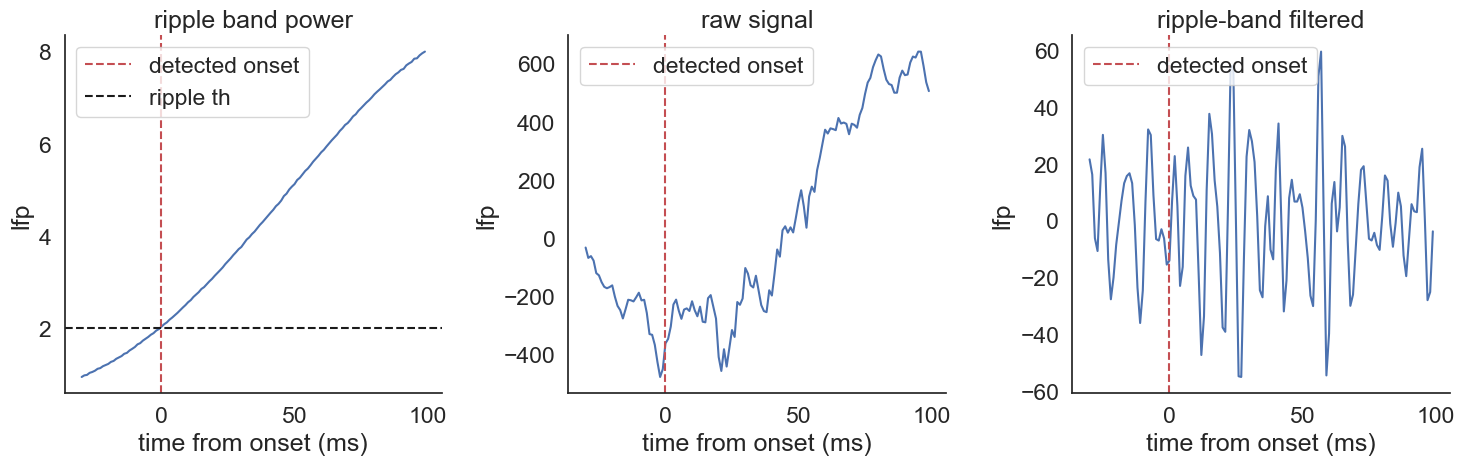

In [36]:
ripple_n = 1

ripple_lfp = lf.bandpass_filter(sleep_lfp,low_f=100,high_f=250, sampling_rate=sampling_rate)


plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
onset = ripples[ripple_n][0]
x = np.arange(-30,100)
y = zscored_power[onset-30:onset+100]
plt.plot(x,y)
plt.axvline(x=0,linestyle='--',c='r',label='detected onset')
plt.axhline(y=2,linestyle='--',c='k',label='ripple th')

plt.title('ripple band power')
plt.xlabel('time from onset (ms)')
plt.ylabel('lfp')
plt.legend()

plt.subplot(1,3,2)
onset = ripples[ripple_n][0]
x = np.arange(-30,100)
y = sleep_lfp[onset-30:onset+100]
plt.plot(x,y)
plt.axvline(x=0,linestyle='--',c='r',label='detected onset')
plt.title('raw signal')
plt.xlabel('time from onset (ms)')
plt.ylabel('lfp')
plt.legend()

plt.subplot(1,3,3)
onset = ripples[ripple_n][0]
x = np.arange(-30,100)
y = ripple_lfp[onset-30:onset+100]
plt.plot(x,y)
plt.axvline(x=0,linestyle='--',c='r',label='detected onset')
plt.title('ripple-band filtered')
plt.xlabel('time from onset (ms)')
plt.ylabel('lfp')
plt.legend()
plt.tight_layout()